In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import argparse
from empath import Empath
%matplotlib inline

In [3]:
lexicon = Empath()
sns.set()

In [4]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']  # List of colors for the plot.

In [9]:
def add_columns(dataframe, sub):

    date = dataframe['Publish Date']
    dataframe['num'] = 1  # number added for the GroupBy process
    dataframe['year'] = [item[:4] for item in date]
    dataframe['month'] = [item[:7] for item in date]
    dataframe['subreddit'] = sub

    d = {}  # dictionary where the emotions data will be stored
    for emotion in emotion_list:
        d[emotion] = []

    for comment in dataframe['Comment']:  # Gives an integer value for each emotion in each comment
        try:
            a = lexicon.analyze(comment)
            [d[emotion].append(a[emotion]/len(comment.split())) for emotion in emotion_list]
            # store the emotions value divided by the number of words the dataframe
        except:
            [d[emotion].append(0) for emotion in emotion_list]  # if the analyze fail,
            # the comment is considered as a no emotion sentence.

    for emotion in emotion_list:
        dataframe[emotion] = d[emotion]

In [22]:
def analyse_some_emotions(dataframe, sub):

    series = []
    count = 0

    fig, axs = plt.subplots(nrows=2, ncols=(len(emotion_list)), figsize=(30, 20), sharey=True)
    fig.suptitle(sub, y=0.995, fontsize=45)

    for emotion in emotion_list:

        year_serie = dataframe.groupby('year')[emotion].mean()
        month_serie = dataframe.groupby('month')[emotion].mean()

        # Plot of emotions by year
        axs[0, count].plot(year_serie, ('-'), color=colors[count], linewidth=6)
        axs[0, count].set_title(f'{emotion}', fontsize=35)
        axs[0, count].set_xlabel("Year", fontsize=20)
        axs[0, count].set_ylabel("Emotion Mean", fontsize=20)

        # Plot of emotions by month
        axs[1, count].bar(list(month_serie.index), list(month_serie.values), color=colors[count])
        axs[1, count].set_title(f'{emotion}', fontsize=35)
        axs[1, count].set_xlabel("Month", fontsize=20)
        axs[1, count].set_ylabel("Emotion Mean", fontsize=20)
        month_list = list(month_serie.index[::12])
        axs[1, count].set_xticks(month_list)

        series.append(year_serie)
        count += 1

    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=30)
    plt.ylim((0, 0.02))

In [23]:
emotion_list = ['negative_emotion', 'hate', 'friends', 'love']

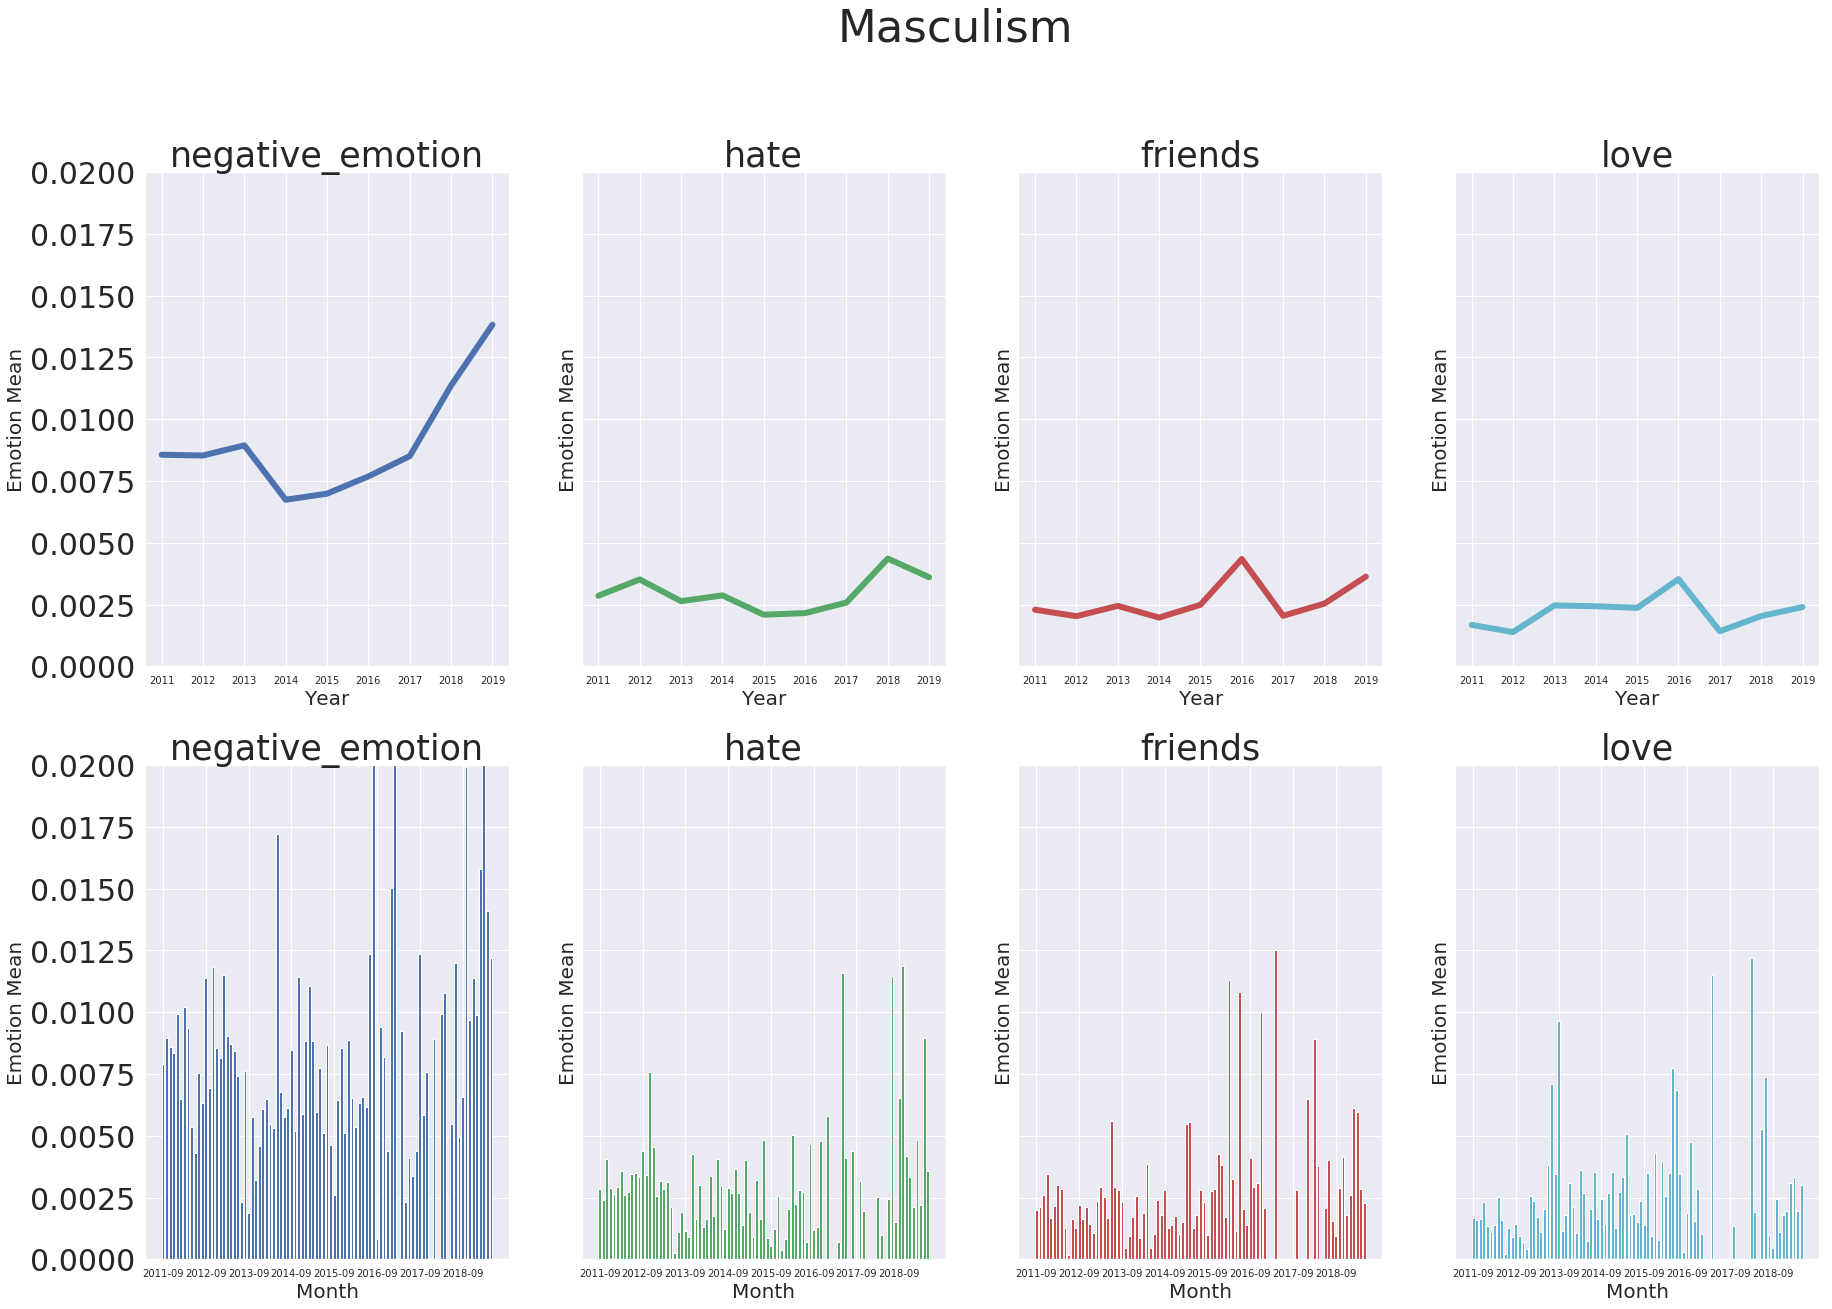

In [24]:
sub = "Masculism"
temp_df = pd.read_csv(f'./data/reddit/cm/{sub}_comments.csv')
add_columns(temp_df, sub)
analyse_some_emotions(temp_df, sub)

In [16]:
def add_columns2(dataframe, sub):

    date = dataframe['Publish Date']
    dataframe['num'] = 1  # number added for the GroupBy process
    dataframe['year'] = [item[:4] for item in date]
    dataframe['month'] = [item[:7] for item in date]
    dataframe['subreddit'] = sub

    d = {}  # dictionary where the emotions data will be stored
    for emotion in emotion_list:
        d[emotion] = []

    for comment in dataframe['Comment']:  # Gives an integer value for each emotion in each comment
        try:
            a = lexicon.analyze(comment)
            [d[emotion].append(1 if a[emotion] > 0 else 0) for emotion in emotion_list]
            # store the emotions value divided by the number of words the dataframe
        except:
            [d[emotion].append(0) for emotion in emotion_list]  # if the analyze fail,
            # the comment is considered as a no emotion sentence.

    for emotion in emotion_list:
        dataframe[emotion] = d[emotion]

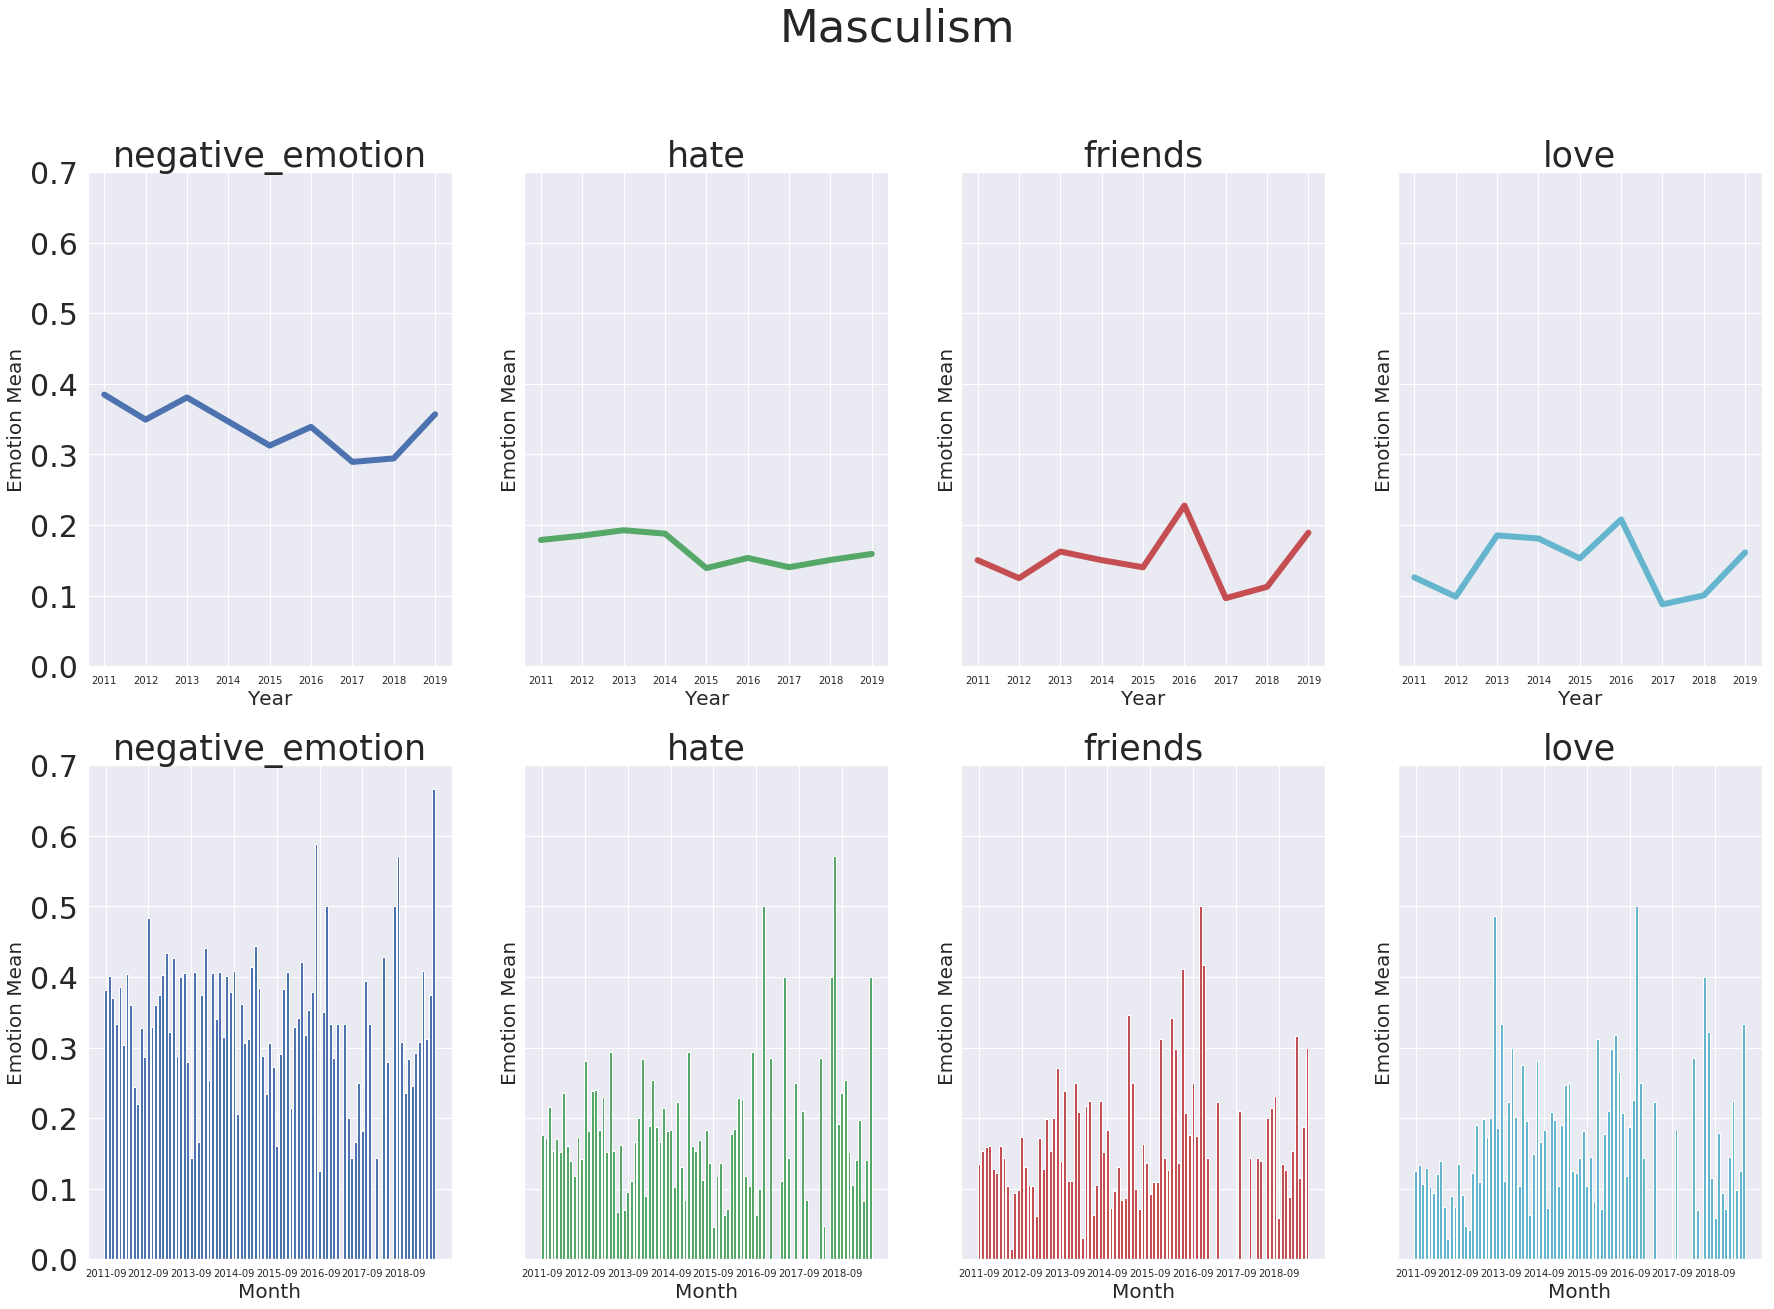

In [17]:
sub = "Masculism"
temp_df = pd.read_csv(f'./data/reddit/cm/{sub}_comments.csv')
add_columns2(temp_df, sub)
analyse_some_emotions(temp_df, sub)